In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import os
from sklearn.metrics import mean_squared_error

os.chdir("/Users/stevengeorge/Documents/Github/fpl-analysis")
pd.options.display.max_columns = None

## Calculate summary statistics for GW 1-3

In [2]:
gameweek_summary_metrics = pd.DataFrame()

### GW 1 

In [3]:
gw_1to3_player_data = pd.read_parquet("data/gw_player_data/gw_1to3_player_data.parquet")
gw_1to3_player_data.head()

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,gw,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,name,team_name,promoted_side,top_6_last_season,season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,ID
0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,33117,1,0,0.0,0,0,0,0,5.5,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,474
1,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,36709,1,2,0.0,0,-5280,2868,8148,5.5,True,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,474
2,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,3,0,30975,1,3,0.0,0,-6882,534,7416,5.4,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Liverpool,0,1,1,1,0,474
3,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,7979,1,0,0.0,0,0,0,0,5.5,False,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,203
4,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,8154,1,2,0.0,0,-1652,336,1988,5.5,True,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,203


In [4]:
# Remove accents
gw_1to3_player_data['name'] = gw_1to3_player_data['name'].apply(lambda x: unidecode.unidecode(x))

In [5]:
gw1_team_selections = pd.read_parquet('data/gw_team_selections/gw1_v1_team_selections.parquet')
gw1_team_selections

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,team_name_Brighton & Hove Albion,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leicester City,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,mohamed_salah,0,0,0,1,8.533012,12.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
1,ayoze_perez,0,0,0,1,6.046611,6.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
2,callum_wilson,0,1,0,0,5.981546,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,trent_alexander_arnold,1,0,0,0,5.633724,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
4,andrew_robertson,1,0,0,0,4.901696,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
5,nathan_ake,1,0,0,0,4.423560,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
6,abdoulaye_doucoure,0,0,0,1,4.421381,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
7,joshua_king,0,1,0,0,4.407183,6.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
8,nathan_redmond,0,0,0,1,4.326617,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
9,james_maddison,0,0,0,1,4.237606,7.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0


In [6]:
gw1_team_selections['gw'] = 1

# Replace needed due to way team selection is done
gw_1to3_player_data['name'] = gw_1to3_player_data['name'].str.replace(" ", "_")
gw_1to3_player_data['name'] = gw_1to3_player_data['name'].str.replace("-", "_")

combined = gw1_team_selections.merge(
    gw_1to3_player_data[['name', 'gw', 'total_points']],
    on=['name', 'gw'],
    how='inner'
)

assert len(combined) == 15

combined

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,team_name_Brighton & Hove Albion,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leicester City,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,gw,total_points
0,mohamed_salah,0,0,0,1,8.533012,12.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1,12
1,ayoze_perez,0,0,0,1,6.046611,6.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,1,3
2,callum_wilson,0,1,0,0,5.981546,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,5
3,trent_alexander_arnold,1,0,0,0,5.633724,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1,5
4,andrew_robertson,1,0,0,0,4.901696,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1,2
5,nathan_ake,1,0,0,0,4.423560,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,2
6,abdoulaye_doucoure,0,0,0,1,4.421381,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1,0
7,joshua_king,0,1,0,0,4.407183,6.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,2
8,nathan_redmond,0,0,0,1,4.326617,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,2
9,james_maddison,0,0,0,1,4.237606,7.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,1,3


In [7]:
combined[['name', 'predictions', 'starting_11', 'total_points']]

,name,predictions,starting_11,total_points
0,mohamed_salah,8.533012,1.0,12
1,ayoze_perez,6.046611,1.0,3
2,callum_wilson,5.981546,1.0,5
3,trent_alexander_arnold,5.633724,1.0,5
4,andrew_robertson,4.901696,1.0,2
5,nathan_ake,4.423560,1.0,2
6,abdoulaye_doucoure,4.421381,1.0,0
7,joshua_king,4.407183,1.0,2
8,nathan_redmond,4.326617,1.0,2
9,james_maddison,4.237606,1.0,3


Actual GW points scored

In [8]:
player_points_total = combined[combined['starting_11'] == 1]['total_points'].sum()

# Captain was selected based on maximimum points prediction
captain_points = combined[combined['predictions'] == combined[combined['starting_11'] == 1]['predictions'].max()]['total_points'].item()

total_points_gw = player_points_total + captain_points

total_points_gw

51

Predicted GW points

In [9]:
player_points_total_pred = combined[combined['starting_11'] == 1]['predictions'].sum()

# Captain was selected based on maximimum points prediction
captain_points_pred = combined[combined['predictions'] == combined[combined['starting_11'] == 1]['predictions'].max()]['predictions'].item()

total_points_gw_pred = player_points_total_pred + captain_points_pred

total_points_gw_pred

65.66521408722735

Team actual points

In [10]:
team_total_points = combined['total_points'].sum()
team_total_points

69

In [11]:
team_total_points_pred = combined['predictions'].sum()
team_total_points_pred

72.35886646421467

In [12]:
points_left_on_bench = combined[combined['starting_11'] == 0]['total_points'].sum()
points_left_on_bench

30

In [13]:
gw_mse = mean_squared_error(combined[combined['starting_11'] == 1]['predictions'], combined[combined['starting_11'] == 1]['total_points'])
gw_mse

6.430448400011704

In [14]:
gw_stats = pd.DataFrame(
    {
        'gw': [1],
        'actual_gw_points': [total_points_gw],
        'predicted_gw_points': [total_points_gw_pred],
        'actual_team_points_excl_captain': [team_total_points],
        'predicted_team_points_excl_captain': [team_total_points_pred],
        'actual_points_left_on_bench': [points_left_on_bench],
        'gw_mse_excl_bench': [gw_mse]
    }
)
gw_stats

,gw,actual_gw_points,predicted_gw_points,actual_team_points_excl_captain,predicted_team_points_excl_captain,actual_points_left_on_bench,gw_mse_excl_bench
0,1,51,65.665214,69,72.358866,30,6.430448


In [15]:
gameweek_summary_metrics = gameweek_summary_metrics.append(gw_stats, ignore_index=True)

### GW 2 

In [16]:
gw_1to3_player_data = pd.read_parquet("data/gw_player_data/gw_1to3_player_data.parquet")
gw_1to3_player_data.head()

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,gw,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,name,team_name,promoted_side,top_6_last_season,season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,ID
0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,33117,1,0,0.0,0,0,0,0,5.5,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,474
1,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,36709,1,2,0.0,0,-5280,2868,8148,5.5,True,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,474
2,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,3,0,30975,1,3,0.0,0,-6882,534,7416,5.4,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Liverpool,0,1,1,1,0,474
3,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,7979,1,0,0.0,0,0,0,0,5.5,False,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,203
4,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,8154,1,2,0.0,0,-1652,336,1988,5.5,True,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,203


In [17]:
gw_1to3_player_data['name'] = gw_1to3_player_data['name'].apply(lambda x: unidecode.unidecode(x))

In [18]:
gw2_team_selections = pd.read_parquet('data/gw_team_selections/gw2_v1_1_team_selections.parquet')

gw2_team_selections['name'] = gw2_team_selections['name'].apply(lambda x: unidecode.unidecode(x))

gw2_team_selections

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,team_name_Brighton & Hove Albion,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leicester City,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,mohamed_salah,0,0,0,1,4.931382,12.5,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
1,nathan_ake,1,0,0,0,4.186734,5.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,lucas_digne,1,0,0,0,4.024506,6.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,patrick_van_aanholt,1,0,0,0,3.655633,5.5,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,hugo_lloris,0,0,1,0,3.541098,5.5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
5,callum_wilson,0,1,0,0,3.485014,8.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
6,joshua_king,0,1,0,0,3.429445,6.5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
7,abdoulaye_doucoure,0,0,0,1,3.367159,6.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
8,trent_alexander_arnold,1,0,0,0,3.308251,7.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
9,james_maddison,0,0,0,1,3.197864,7.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0


In [19]:
gw2_team_selections['gw'] = 2

gw_1to3_player_data['name'] = gw_1to3_player_data['name'].str.replace(" ", "_")
gw_1to3_player_data['name'] = gw_1to3_player_data['name'].str.replace("-", "_")

combined = gw2_team_selections.merge(
    gw_1to3_player_data[['name', 'gw', 'total_points']],
    on=['name', 'gw'],
    how='inner'
)
combined

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,team_name_Brighton & Hove Albion,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leicester City,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,gw,total_points
0,mohamed_salah,0,0,0,1,4.931382,12.5,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,2,3
1,nathan_ake,1,0,0,0,4.186734,5.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,1
2,lucas_digne,1,0,0,0,4.024506,6.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,11
3,patrick_van_aanholt,1,0,0,0,3.655633,5.5,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,2
4,hugo_lloris,0,0,1,0,3.541098,5.5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,2,3
5,callum_wilson,0,1,0,0,3.485014,8.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,5
6,joshua_king,0,1,0,0,3.429445,6.5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,6
7,abdoulaye_doucoure,0,0,0,1,3.367159,6.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,2,2
8,trent_alexander_arnold,1,0,0,0,3.308251,7.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,2,1
9,james_maddison,0,0,0,1,3.197864,7.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,2,5


In [20]:
combined[['name', 'predictions', 'starting_11', 'total_points']]

,name,predictions,starting_11,total_points
0,mohamed_salah,4.931382,1.0,3
1,nathan_ake,4.186734,1.0,1
2,lucas_digne,4.024506,1.0,11
3,patrick_van_aanholt,3.655633,1.0,2
4,hugo_lloris,3.541098,1.0,3
5,callum_wilson,3.485014,1.0,5
6,joshua_king,3.429445,1.0,6
7,abdoulaye_doucoure,3.367159,1.0,2
8,trent_alexander_arnold,3.308251,1.0,1
9,james_maddison,3.197864,1.0,5


Actual GW points scored

In [21]:
player_points_total = combined[combined['starting_11'] == 1]['total_points'].sum()

# Captain was selected based on maximimum points prediction
captain_points = combined[combined['predictions'] == combined[combined['starting_11'] == 1]['predictions'].max()]['total_points'].item()

total_points_gw = player_points_total + captain_points

total_points_gw

44

Predicted GW points

In [22]:
player_points_total_pred = combined[combined['starting_11'] == 1]['predictions'].sum()

# Captain was selected based on maximimum points prediction
captain_points_pred = combined[combined['predictions'] == combined[combined['starting_11'] == 1]['predictions'].max()]['predictions'].item()

total_points_gw_pred = player_points_total_pred + captain_points_pred

total_points_gw_pred

44.906060314984316

Team actual points

In [23]:
team_total_points = combined['total_points'].sum()
team_total_points

51

In [24]:
team_total_points_pred = combined['predictions'].sum()
team_total_points_pred

49.824698583760025

In [25]:
points_left_on_bench = combined[combined['starting_11'] == 0]['total_points'].sum()
points_left_on_bench

10

In [26]:
gw_mse = mean_squared_error(combined[combined['starting_11'] == 1]['predictions'], combined[combined['starting_11'] == 1]['total_points'])
gw_mse

7.785739490774406

In [27]:
gw_stats = pd.DataFrame(
    {
        'gw': [2],
        'actual_gw_points': [total_points_gw],
        'predicted_gw_points': [total_points_gw_pred],
        'actual_team_points_excl_captain': [team_total_points],
        'predicted_team_points_excl_captain': [team_total_points_pred],
        'actual_points_left_on_bench': [points_left_on_bench],
        'gw_mse_excl_bench': [gw_mse]
    }
)
gw_stats

,gw,actual_gw_points,predicted_gw_points,actual_team_points_excl_captain,predicted_team_points_excl_captain,actual_points_left_on_bench,gw_mse_excl_bench
0,2,44,44.90606,51,49.824699,10,7.785739


In [28]:
gameweek_summary_metrics = gameweek_summary_metrics.append(gw_stats, ignore_index=True)

### GW 3 (uses new data collection script)

In [29]:
gw3_team_selections = pd.read_parquet('data/gw_team_selections/gw3_v1_1_team_selections.parquet')
gw3_team_selections

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,team_name_Brighton & Hove Albion,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leicester City,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,joel_matip,1,0,0,0,4.327432,5.4,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
1,callum_wilson,0,1,0,0,3.820162,7.9,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,nathan_aké,1,0,0,0,3.578109,5.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,nathan_redmond,0,0,0,1,3.548334,6.4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
4,joshua_king,0,1,0,0,3.505983,6.5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
5,ayoze_pérez,0,0,0,1,3.306408,6.5,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
6,hugo_lloris,0,0,1,0,3.230990,5.5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
7,patrick_van_aanholt,1,0,0,0,3.152361,5.5,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
8,ricardo_domingos_barbosa_pereira,1,0,0,0,3.102233,6.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
9,james_maddison,0,0,0,1,3.061834,7.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0


In [30]:
gw_1to3_player_data = pd.read_parquet("data/gw_player_data/gw_1to3_player_data.parquet")
gw_1to3_player_data.head()

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,gw,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,name,team_name,promoted_side,top_6_last_season,season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,kickoff_month_Aug,late_kickoff,early_kickoff,ID
0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,33117,1,0,0.0,0,0,0,0,5.5,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,474
1,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,36709,1,2,0.0,0,-5280,2868,8148,5.5,True,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,474
2,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,3,0,30975,1,3,0.0,0,-6882,534,7416,5.4,False,0,shkodran_mustafi,Arsenal,0,1,2019-20,1,0,0,0,Liverpool,0,1,1,1,0,474
3,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,1,0,7979,1,0,0.0,0,0,0,0,5.5,False,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Newcastle United,0,0,1,0,0,203
4,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,2,0,8154,1,2,0.0,0,-1652,336,1988,5.5,True,0,héctor_bellerín,Arsenal,0,1,2019-20,1,0,0,0,Burnley,0,0,1,0,1,203


In [31]:
gw3_team_selections['gw'] = 3

gw_1to3_player_data['name'] = gw_1to3_player_data['name'].str.replace(" ", "_")
gw_1to3_player_data['name'] = gw_1to3_player_data['name'].str.replace("-", "_")

combined = gw3_team_selections.merge(
    gw_1to3_player_data[['name', 'gw', 'total_points']],
    on=['name', 'gw'],
    how='inner'
)

assert len(combined) == 15
combined

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,team_name_Bournemouth,team_name_Brighton & Hove Albion,team_name_Burnley,team_name_Chelsea,team_name_Crystal Palace,team_name_Everton,team_name_Leicester City,team_name_Liverpool,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,gw,total_points
0,joel_matip,1,0,0,0,4.327432,5.4,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,3,9
1,callum_wilson,0,1,0,0,3.820162,7.9,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3,5
2,nathan_aké,1,0,0,0,3.578109,5.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3,1
3,nathan_redmond,0,0,0,1,3.548334,6.4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,3,10
4,joshua_king,0,1,0,0,3.505983,6.5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3,2
5,ayoze_pérez,0,0,0,1,3.306408,6.5,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,3,2
6,hugo_lloris,0,0,1,0,3.230990,5.5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,3,2
7,patrick_van_aanholt,1,0,0,0,3.152361,5.5,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3,10
8,ricardo_domingos_barbosa_pereira,1,0,0,0,3.102233,6.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,3,2
9,james_maddison,0,0,0,1,3.061834,7.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,3,6


Actual GW points scored

In [32]:
player_points_total = combined[combined['starting_11'] == 1]['total_points'].sum()

# Captain was selected based on maximimum points prediction
captain_points = combined[combined['predictions'] == combined[combined['starting_11'] == 1]['predictions'].max()]['total_points'].item()

total_points_gw = player_points_total + captain_points

total_points_gw

65

Predicted GW points

In [33]:
player_points_total_pred = combined[combined['starting_11'] == 1]['predictions'].sum()

# Captain was selected based on maximimum points prediction
captain_points_pred = combined[combined['predictions'] == combined[combined['starting_11'] == 1]['predictions'].max()]['predictions'].item()

total_points_gw_pred = player_points_total_pred + captain_points_pred

total_points_gw_pred

41.97303756005449

Team actual points

In [34]:
team_total_points = combined['total_points'].sum()
team_total_points

84

In [35]:
team_total_points_pred = combined['predictions'].sum()
team_total_points_pred

48.35196406135732

In [36]:
points_left_on_bench = combined[combined['starting_11'] == 0]['total_points'].sum()
points_left_on_bench

28

In [37]:
gw_mse = mean_squared_error(combined[combined['starting_11'] == 1]['predictions'], combined[combined['starting_11'] == 1]['total_points'])
gw_mse

13.602683203307828

In [38]:
gw_stats = pd.DataFrame(
    {
        'gw': [3],
        'actual_gw_points': [total_points_gw],
        'predicted_gw_points': [total_points_gw_pred],
        'actual_team_points_excl_captain': [team_total_points],
        'predicted_team_points_excl_captain': [team_total_points_pred],
        'actual_points_left_on_bench': [points_left_on_bench],
        'gw_mse_excl_bench': [gw_mse]
    }
)
gw_stats

,gw,actual_gw_points,predicted_gw_points,actual_team_points_excl_captain,predicted_team_points_excl_captain,actual_points_left_on_bench,gw_mse_excl_bench
0,3,65,41.973038,84,48.351964,28,13.602683


In [39]:
gameweek_summary_metrics = gameweek_summary_metrics.append(gw_stats, ignore_index=True)

In [40]:
gameweek_summary_metrics.to_parquet('data/monitoring/gameweek_summary_metrics.parquet', index=False)

## Monitoring charts

In [41]:
gameweek_summary_metrics = pd.read_parquet('data/monitoring/gameweek_summary_metrics.parquet')
gameweek_summary_metrics

,gw,actual_gw_points,predicted_gw_points,actual_team_points_excl_captain,predicted_team_points_excl_captain,actual_points_left_on_bench,gw_mse_excl_bench
0,1,51,65.665214,69,72.358866,30,6.430448
1,2,44,44.906060,51,49.824699,10,7.785739
2,3,65,41.973038,84,48.351964,28,13.602683


Text(0.5, 1.0, 'Actual vs Predicted Gameweek Points')

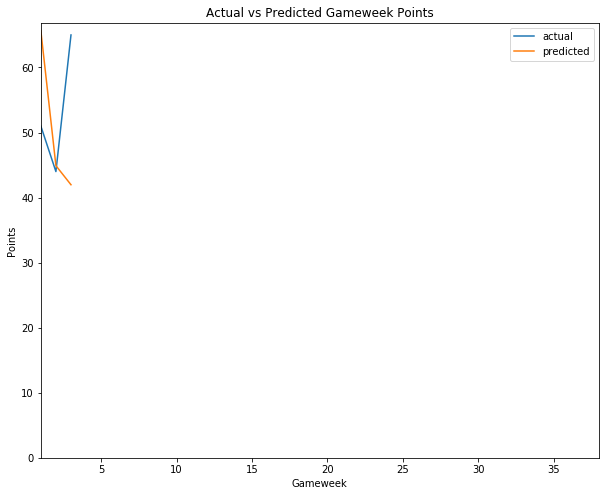

In [42]:
plt.figure(figsize=(10,8))
sns.lineplot(x='gw', y='actual_gw_points', data=gameweek_summary_metrics, label='actual')
sns.lineplot(x='gw', y='predicted_gw_points', data=gameweek_summary_metrics, label='predicted')
plt.ylabel('Points')
plt.xlabel('Gameweek')
plt.ylim(0)
plt.xlim(1, 38)
plt.legend()
plt.title('Actual vs Predicted Gameweek Points')

Text(0.5, 1.0, 'Actual vs Predicted Team Points (excluding double points)')

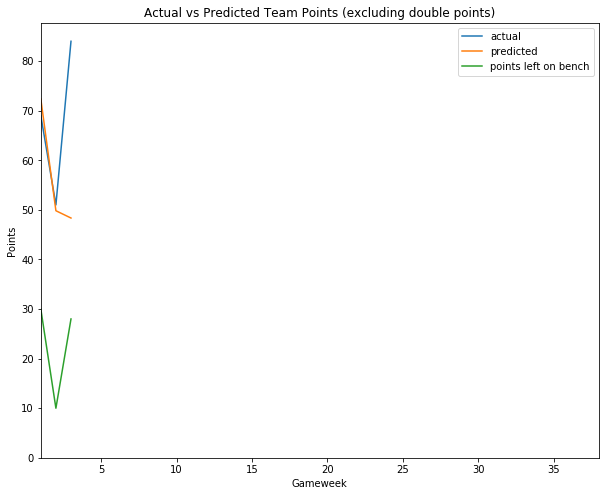

In [44]:
plt.figure(figsize=(10,8))
sns.lineplot(x='gw', y='actual_team_points_excl_captain', data=gameweek_summary_metrics, label='actual')
sns.lineplot(x='gw', y='predicted_team_points_excl_captain', data=gameweek_summary_metrics, label='predicted')
sns.lineplot(x='gw', y='actual_points_left_on_bench', data=gameweek_summary_metrics, label='points left on bench')
plt.ylabel('Points')
plt.xlabel('Gameweek')
plt.ylim(0)
plt.xlim(1, 38)
plt.legend()
plt.title('Actual vs Predicted Team Points (excluding double points)')

Text(0.5, 1.0, 'Mean squared error (excluding bench)')

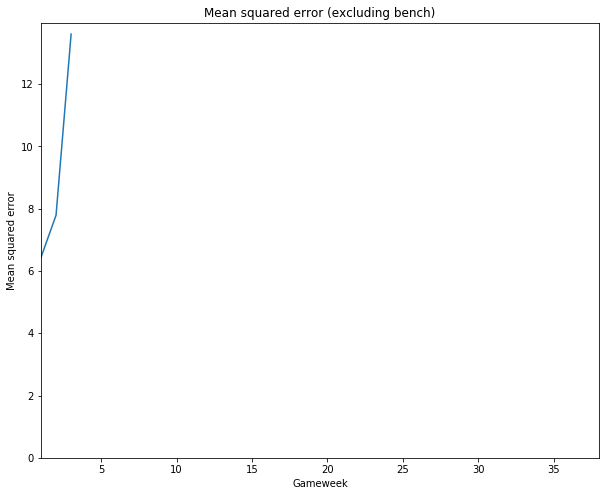

In [45]:
plt.figure(figsize=(10,8))
sns.lineplot(x='gw', y='gw_mse_excl_bench', data=gameweek_summary_metrics)
plt.ylabel('Mean squared error')
plt.xlabel('Gameweek')
plt.ylim(0)
plt.xlim(1, 38)
plt.title('Mean squared error (excluding bench)')